<a href="https://colab.research.google.com/github/HemantTiwariGitHub/IntelligenceCodes/blob/master/HiddenMarkovModel_PoSTaggingFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## POS tagging using modified Viterbi

### Data Preparation

In [75]:
#Importing libraries
import nltk
import random
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time


nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [17]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

Exploring and Processing Data


In [18]:
#check some details 
print(nltk_data[:5])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

In [33]:
# we will need to split here as train and test needs to happen on entire sentences
# Splitting into train and test
random.seed(100)
train_set, validation_set = train_test_split(nltk_data,test_size=0.05)

print("Total Training Sentences  : " + str(len(train_set)))
print("Total Validations Sentences : " + str(len(validation_set)))
print(train_set[:5])



Total Training Sentences  : 3718
Total Validations Sentences : 196
[[('But', 'CONJ'), ('a', 'DET'), ('1948', 'NUM'), ('law', 'NOUN'), ('barred', 'VERB'), ('the', 'DET'), ('``', '.'), ('dissemination', 'NOUN'), ("''", '.'), ('of', 'ADP'), ('that', 'DET'), ('material', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('U.S.', 'NOUN'), ('.', '.')], [('Mr.', 'NOUN'), ('Spiegel', 'NOUN'), ("'s", 'PRT'), ('next', 'ADJ'), ('career', 'NOUN'), ('move', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('subject', 'NOUN'), ('of', 'ADP'), ('speculation', 'NOUN'), ('on', 'ADP'), ('Wall', 'NOUN'), ('Street', 'NOUN'), ('.', '.')], [('Traders', 'NOUN'), ('said', 'VERB'), ('0', 'X'), ('prices', 'NOUN'), ('also', 'ADV'), ('were', 'VERB'), ('supported', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('widespread', 'ADJ'), ('rumors', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('Soviet', 'NOUN'), ('Union', 'NOUN'), ('is', 'VERB'), ('on', 'ADP'), ('the', 'DET'), ('verge', 'NOUN'), ('of', 'ADP'), ('*', 'X'), ('receiving', 'VERB'), ('mos

In [34]:
# Create List of Word and Tokens
WordTagPairList = [pair for sent in train_set for pair in sent]
print(WordTagPairList[:5])


[('But', 'CONJ'), ('a', 'DET'), ('1948', 'NUM'), ('law', 'NOUN'), ('barred', 'VERB')]


In [40]:
# Finding Total Data, Unique words and Tags
print("Total Word Tag Pairs : " + str(len(WordTagPairList))) 

wordTokens = [pair[0] for pair in WordTagPairList]
tagTokens = [pair[1] for pair in WordTagPairList]

#Unique word tokens is the vocabulary
Vocab = set(wordTokens)
#Unique Tags are the tag set
TagSet = set(tagTokens)

print("Vocab List : " +str(Vocab))
print("Unique Vocab Size : " + str(len(Vocab))) 
print ("Tags List : " + str(TagSet))
print("Unique Tags Size : " + str(len(TagSet))) 



Total Word Tag Pairs : 95527
Vocab List : {'frequently', 'Piero', 'sent', '*T*-226', 'carefree', '*-83', 'Telerate', 'high-volume', 'labor-management', 'narcotics', 'vague', 'Irving', 'decorator', 'switched', 'ordering', 'diplomatic', 'two-tiered', 'retailing', 'Sable', 'research', 'established', 'Sure', 'machinery', 'symptoms', 'based', 'DD', '340,000', 'Earnings', 'organization', 'one-yen', 'revived', 'bottlenecks', 'encourage', 'grown', 'Seagate', 'Waterloo', 'partial', 'Rotie', 'monopolize', 'sought', '*T*-66', 'Heatherington', 'period', '1.35', 'hierarchical', 'Newspapers', 'Reuter', 'McDonald', 'Basic', 'consist', '14.00', 'Can', 'defined', 'Treasury', 'incest', '*T*-172', 'asset', 'non-biodegradable', 'Class', 'frantic', 'billed', '5.8', 'security', 'Nature', 'Romanee-Conti', 'expectations', 'charges', 'because', 'Lake', 'Kathryn', 'judges', '500,000', 'adviser', 'surely', 'near', 'gunship', 'single-handedly', 'Macmillan\\/McGraw-Hill', 'sources', 'fails', 'Somerset', '*T*-46', 

### Build the vanilla Viterbi based POS tagger

In [ ]:
#First We need to build the Transition Probability (Tag to Tag) and Emission Probability (Tag to Vocab Word) Matrix 

Solving "The learning problem" Stage

In [48]:
# compute probability next tag based on previous tag 

def getTransitionProbability(nextTag, baseTag, train_bag = WordTagPairList):
    tags = [pair[1] for pair in train_bag]
    TotalCountOfBaseTag = len([t for t in tags if t==baseTag])
    TotalCountNextTagFollowingBaseTag = 0
    for index in range(len(tags)-1):
        if tags[index]==baseTag and tags[index+1] == nextTag:
            TotalCountNextTagFollowingBaseTag += 1
    return (TotalCountNextTagFollowingBaseTag, TotalCountOfBaseTag)

def getProbability(Numerator, Denominator):
    return Numerator/Denominator

In [52]:
#Test

print(getTransitionProbability(nextTag='VERB', baseTag='NOUN'))
count1 , count2 = getTransitionProbability(nextTag='VERB', baseTag='NOUN')
print(getProbability(count1, count2))
print(getTransitionProbability(nextTag='VERB', baseTag='ADV'))
print(getTransitionProbability(nextTag='VERB', baseTag='.'))
print(getTransitionProbability(nextTag='DET', baseTag='.'))



(4019, 27377)
0.1468020601234613
(1031, 3017)
(982, 11098)
(1927, 11098)


In [55]:
#create the Transition Probability Matrix
TransitionProbabilityMatrix = np.zeros((len(TagSet), len(TagSet)), dtype='float32')
for i, baseTag in enumerate(list(TagSet)):
    for j, nextTag in enumerate(list(TagSet)): 
        nextTagOnBaseTagCount, baseTagCount = getTransitionProbability(nextTag, baseTag)
        TransitionProbabilityMatrix[i, j] = nextTagOnBaseTagCount/baseTagCount

In [57]:
# checking values of Transition Probabilities
print(TransitionProbabilityMatrix)
print("Dimensions of Transition Matrix are : " +str(len(TransitionProbabilityMatrix)) + "," + str(len(TransitionProbabilityMatrix[0])) )



[[1.65562909e-02 1.35654779e-02 4.05896194e-02 3.23862433e-01
  8.22473876e-03 6.25934601e-02 1.38859218e-03 3.47148031e-02
  6.96432367e-02 1.07028410e-01 3.20871621e-01 9.61333048e-04]
 [1.18992373e-01 8.08750391e-02 1.37222409e-01 6.82797506e-02
  3.41730207e-01 3.18196900e-02 1.49154793e-02 2.35333107e-02
  1.49154793e-02 1.29930392e-01 3.04938685e-02 7.29201175e-03]
 [9.17282403e-02 5.29825203e-02 9.34402570e-02 1.73634887e-01
  8.84844139e-02 8.15462247e-02 2.52297707e-03 2.65813656e-02
  6.59578294e-02 4.39718850e-02 2.21120924e-01 5.79383671e-02]
 [9.54452064e-03 1.26857553e-02 1.71559751e-02 5.55756921e-03
  3.96278836e-02 2.23510936e-02 2.41633446e-04 4.56687212e-02
  3.74531839e-03 2.04421893e-01 6.38516366e-01 4.83266893e-04]
 [9.10717100e-02 8.13501328e-02 3.47643495e-02 1.35013223e-01
  1.70399755e-01 2.27095969e-02 3.11090369e-02 2.16752216e-01
  3.56198475e-02 6.57178387e-02 1.10359311e-01 5.13299135e-03]
 [3.37178335e-02 2.95770471e-03 1.19195506e-01 2.95770471e-03
  1

In [60]:
TransitionProbabilityMatrixDF = pd.DataFrame(TransitionProbabilityMatrix, columns = list(TagSet), index=list(TagSet))
TransitionProbabilityMatrixDF.head(5)

,ADP,ADV,.,DET,VERB,NUM,PRT,X,PRON,ADJ,NOUN,CONJ
ADP,0.016556,0.013565,0.040590,0.323862,0.008225,0.062593,0.001389,0.034715,0.069643,0.107028,0.320872,0.000961
ADV,0.118992,0.080875,0.137222,0.068280,0.341730,0.031820,0.014915,0.023533,0.014915,0.129930,0.030494,0.007292
.,0.091728,0.052983,0.093440,0.173635,0.088484,0.081546,0.002523,0.026581,0.065958,0.043972,0.221121,0.057938
DET,0.009545,0.012686,0.017156,0.005558,0.039628,0.022351,0.000242,0.045669,0.003745,0.204422,0.638516,0.000483
VERB,0.091072,0.081350,0.034764,0.135013,0.170400,0.022710,0.031109,0.216752,0.035620,0.065718,0.110359,0.005133


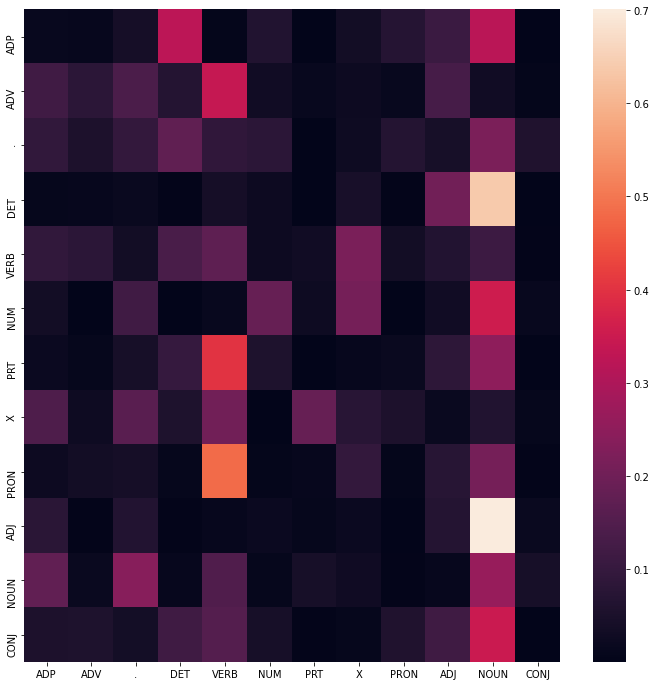

In [62]:
#checking the heatmap for how good the dependencies are.
plt.figure(figsize=(12, 12))
sns.heatmap(TransitionProbabilityMatrixDF)
plt.show()

In [63]:
#Creating Vocab Emission Probability based on Tag State (TagSize x Vocab)matrix
tagCount = len(TagSet)
vocabCount = len(Vocab)
EmissionProbabilityMatrix = np.zeros((tagCount, vocabCount))

In [64]:
#Emission Probability
def getEmissionProbability(word, tag, train_bag = WordTagPairList):
    BaseWordTagPairList = [pair for pair in train_bag if pair[1]==tag]
    BaseTagCount = len(BaseWordTagPairList)
    WordEmissionCountOnTag = [pair[0] for pair in BaseWordTagPairList if pair[0]==word]
    WordEmissionCount = len(WordEmissionCountOnTag)
    
    return (WordEmissionCount, BaseTagCount)

In [68]:
#test
print(getEmissionProbability('best', 'ADJ'))


(12, 6069)


Creating the HMM Model with Viterbi Heuristics

In [79]:
#Tagging Using Hiden Markov Model and Viterbi Heuristic
def HMMTaggerWithViterbi(wordList, train_bag = WordTagPairList):
    PredictedTagList = []
    
    TagsList = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(wordList):
        #initialise list of probability column for a given observation
        CandidateProbabilityList = [] 
        for tag in TagsList:
            if key == 0:
                #Probability of Tag Just after Start State 
                TransitionProbability = TransitionProbabilityMatrixDF.loc['.', tag]
            else:
                #Probability of Tag after Previous Tag
                TransitionProbability = TransitionProbabilityMatrixDF.loc[PredictedTagList[-1], tag]
                
            #Emission Probability
            EmissionCount, TotalCount = getEmissionProbability(wordList[key], tag)
            EmissionProbability = EmissionCount/TotalCount

            #State Probability 
            StateProbability = EmissionProbability * TransitionProbability    
            CandidateProbabilityList.append(StateProbability)
            
        maximumStateProbability = max(CandidateProbabilityList)
        # getting state for which probability is maximum
        PredictedTag = TagsList[CandidateProbabilityList.index(maximumStateProbability)] 
        PredictedTagList.append(PredictedTag)
    return list(zip(wordList, PredictedTagList))


Validation Set Evaluation

In [73]:
random.seed(100)

# choose random 5 sents
rndom = [random.randint(1,len(validation_set)) for x in range(5)]

# list of validation sentences
validationSentences = [validation_set[i] for i in rndom]

#list of validation Tuples created from Validation Sentences
validationTuples = [tup for sent in validationSentences for tup in sent]
print(validationTuples)


#list of only Validation words, stripped off the tags. These will be predicted by HMMTagger and later compared for accuracy
ValidationWords = [tup[0] for sent in validationSentences for tup in sent]
print(ValidationWords)


[('The', 'DET'), ('thrift', 'NOUN'), ('surely', 'ADV'), ('could', 'VERB'), ('be', 'VERB'), ('sold', 'VERB'), ('*-1', 'X'), ('for', 'ADP'), ('more', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('value', 'NOUN'), ('of', 'ADP'), ('its', 'PRON'), ('equity', 'NOUN'), (',', '.'), ('financial', 'ADJ'), ('industry', 'NOUN'), ('executives', 'NOUN'), ('say', 'VERB'), ('0', 'X'), ('*T*-2', 'X'), ('.', '.'), ('Mr.', 'NOUN'), ('Coleman', 'NOUN'), ('said', 'VERB'), ('this', 'DET'), ('week', 'NOUN'), ('that', 'ADP'), ('he', 'PRON'), ('would', 'VERB'), ('devote', 'VERB'), ('the', 'DET'), ('remainder', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('political', 'ADJ'), ('season', 'NOUN'), ('to', 'PRT'), ('positive', 'ADJ'), ('campaigning', 'NOUN'), (',', '.'), ('but', 'CONJ'), ('the', 'DET'), ('truce', 'NOUN'), ('lasted', 'VERB'), ('only', 'ADV'), ('hours', 'NOUN'), ('.', '.'), ('California', 'NOUN'), ("'s", 'PRT'), ('education', 'NOUN'), ('department', 'NOUN'), ('suspects', 'VERB'), ('adult', 'NOUN'), ('respon

In [98]:
def getHMMAccuracy(testSetList, OriginalWordTagList):
    start = time.time()
    TaggedWordSequence = HMMTaggerWithViterbi(testSetList)
    end = time.time()
    difference = end-start
    print("Time taken in seconds: ", difference)
    print(TaggedWordSequence)
    print(OriginalWordTagList)
    
    correctlyTaggedWordCount = [i for i, j in zip(TaggedWordSequence, OriginalWordTagList) if i == j] 
    accuracy = len(correctlyTaggedWordCount)/len(TaggedWordSequence)
    incorrect_tagged_cases = [[OriginalWordTagList[i-1],j] for i, j in enumerate(zip(TaggedWordSequence, OriginalWordTagList)) if j[0]!=j[1]]

    print ("Accuracy : ", accuracy)
    print("Incorrect Cases :" , incorrect_tagged_cases)


In [99]:
getHMMAccuracy(ValidationWords, validationTuples )

Time taken in seconds:  10.561721086502075
[('The', 'DET'), ('thrift', 'NOUN'), ('surely', 'ADV'), ('could', 'VERB'), ('be', 'VERB'), ('sold', 'VERB'), ('*-1', 'X'), ('for', 'ADP'), ('more', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('value', 'NOUN'), ('of', 'ADP'), ('its', 'PRON'), ('equity', 'NOUN'), (',', '.'), ('financial', 'ADJ'), ('industry', 'NOUN'), ('executives', 'NOUN'), ('say', 'VERB'), ('0', 'X'), ('*T*-2', 'X'), ('.', '.'), ('Mr.', 'NOUN'), ('Coleman', 'NOUN'), ('said', 'VERB'), ('this', 'DET'), ('week', 'NOUN'), ('that', 'ADP'), ('he', 'PRON'), ('would', 'VERB'), ('devote', 'VERB'), ('the', 'DET'), ('remainder', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('political', 'ADJ'), ('season', 'NOUN'), ('to', 'PRT'), ('positive', 'ADJ'), ('campaigning', 'NOUN'), (',', '.'), ('but', 'CONJ'), ('the', 'DET'), ('truce', 'NOUN'), ('lasted', 'ADP'), ('only', 'ADV'), ('hours', 'NOUN'), ('.', '.'), ('California', 'NOUN'), ("'s", 'PRT'), ('education', 'NOUN'), ('department', 'NOUN'), ('suspe

Test On Entire Validation Set

In [103]:
#list of validation Tuples created from Validation Sentences
validationTuples = [tup for sent in validation_set for tup in sent]

#list of only Validation words, stripped off the tags. These will be predicted by HMMTagger and later compared for accuracy
ValidationWords = [tup[0] for sent in validation_set for tup in sent]
print(ValidationWords)
print(len(ValidationWords))

['``', 'It', "'s", 'precisely', 'the', 'kind', 'of', 'product', 'that', '*T*-1', "'s", 'created', 'the', 'municipal', 'landfill', 'monster', ',', "''", 'the', 'editors', 'wrote', '*T*-2', '.', 'U.S.', 'News', "'", 'circulation', 'in', 'the', 'same', 'time', 'was', '2,303,328', ',', 'down', '2.6', '%', '.', 'I', 'believe', '0', 'you', 'have', '*-1', 'to', 'use', 'the', 'system', '*-2', 'to', 'change', 'it', '.', 'It', "'s", 'the', 'latest', 'investment', 'craze', 'sweeping', 'Wall', 'Street', ':', 'a', 'rash', 'of', 'new', 'closed-end', 'country', 'funds', ',', 'those', 'publicly', 'traded', 'portfolios', 'that', '*T*-37', 'invest', 'in', 'stocks', 'of', 'a', 'single', 'foreign', 'country', '.', 'The', 'announcement', 'follows', 'a', 'sharper', '$', '2.2', 'billion', '*U*', 'decline', 'in', 'the', 'country', "'s", 'foreign', 'reserves', 'in', 'September', 'to', '$', '86.12', 'billion', '*U*', '.', 'Messrs.', 'Brownell', 'and', 'Kean', 'say', '0', 'they', 'are', 'unaware', 'of', 'any', '

In [104]:
getHMMAccuracy(ValidationWords, validationTuples)

Time taken in seconds:  453.9200837612152
[('``', '.'), ('It', 'PRON'), ("'s", 'VERB'), ('precisely', 'ADV'), ('the', 'DET'), ('kind', 'NOUN'), ('of', 'ADP'), ('product', 'NOUN'), ('that', 'ADP'), ('*T*-1', 'X'), ("'s", 'PRT'), ('created', 'VERB'), ('the', 'DET'), ('municipal', 'ADJ'), ('landfill', 'ADP'), ('monster', 'ADP'), (',', '.'), ("''", '.'), ('the', 'DET'), ('editors', 'NOUN'), ('wrote', 'VERB'), ('*T*-2', 'X'), ('.', '.'), ('U.S.', 'NOUN'), ('News', 'NOUN'), ("'", 'PRT'), ('circulation', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('same', 'ADJ'), ('time', 'NOUN'), ('was', 'VERB'), ('2,303,328', 'ADP'), (',', '.'), ('down', 'ADV'), ('2.6', 'NUM'), ('%', 'NOUN'), ('.', '.'), ('I', 'PRON'), ('believe', 'VERB'), ('0', 'X'), ('you', 'PRON'), ('have', 'VERB'), ('*-1', 'X'), ('to', 'PRT'), ('use', 'VERB'), ('the', 'DET'), ('system', 'NOUN'), ('*-2', 'X'), ('to', 'PRT'), ('change', 'VERB'), ('it', 'PRON'), ('.', '.'), ('It', 'PRON'), ("'s", 'VERB'), ('the', 'DET'), ('latest', 'ADJ'), ('

Validation Sample 

In [ ]:
#creating the test Set


### Solve the problem of unknown words

#### Evaluating tagging accuracy

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications